In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import HTML, display
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score  
from sklearn.model_selection import train_test_split  
from sklearn.datasets import make_classification  
def styled_heading(text, background_color='white', text_color='black'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        font-family: 'Montserrat', sans-serif;
        color: {text_color};
        padding: 10px;
        font-size: 20px;
        font-weight: bold;
        line-height: 1;
        border-radius: 20px 20px 0 0;
        margin: 20px 0;  
        box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.2);
        border: 3px  {text_color};
    ">
        {text}
    </div>
    """

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\semptomlar\diabetes_data.csv.csv',delimiter=';')
display(HTML(styled_heading("Veri Setinin Başı")))
display(df.head())


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
display(HTML(styled_heading("Veri Setinin Sonu")))
display(df.tail())

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
display(HTML(styled_heading("Veri Boyutu")))
nRow, nCol = df.shape
print(f'Number of rows is {nRow}.')
print(f'Number of columns is {nCol}.')

Number of rows is 520.
Number of columns is 17.


In [6]:
display(HTML(styled_heading("Veri Hakkında Bilgi")))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [8]:
display(HTML(styled_heading("Cinsiyet Sütunu Etiket Kodlama (Label Encoding)")))
print(df.gender.value_counts(),'\n')
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df.gender.value_counts())

gender
Male      328
Female    192
Name: count, dtype: int64 

gender
1    328
0    192
Name: count, dtype: int64


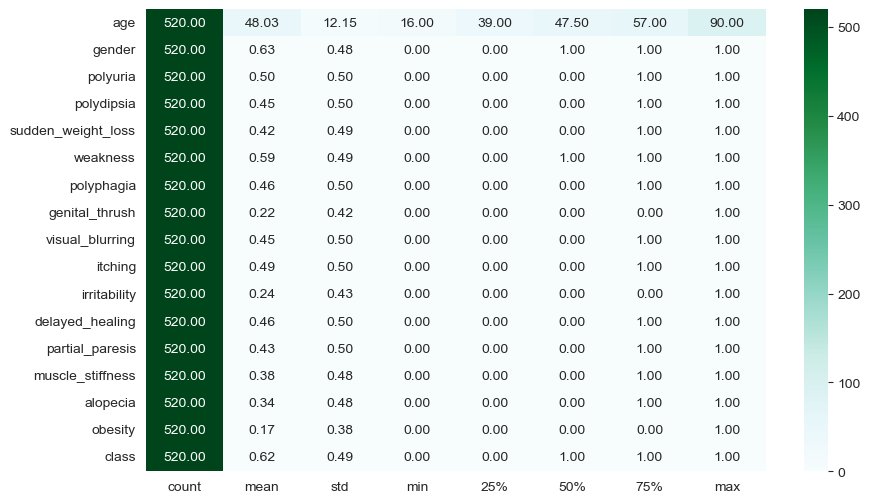

In [10]:
display(HTML(styled_heading("Özet İstatistiklerin Isı Haritası ")))
summary_stats = df.describe()
plt.figure(figsize=(10,6))
sns.heatmap(summary_stats.T, annot=True, cmap="BuGn", fmt='.2f')
plt.show()

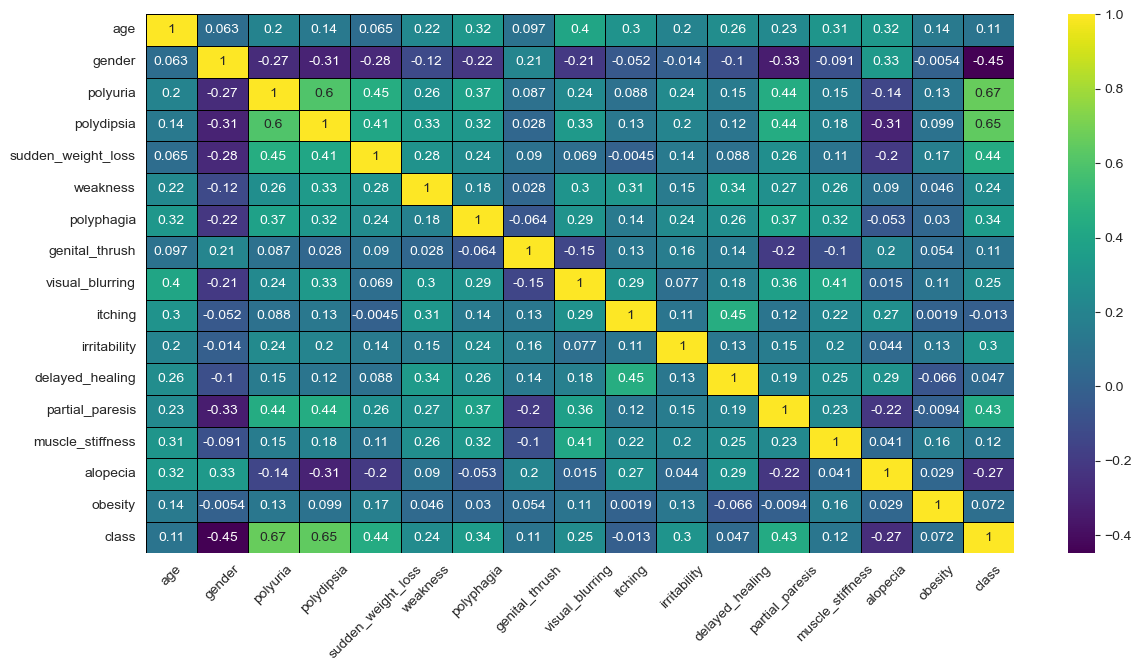

In [11]:
display(HTML(styled_heading("Diyabet Korelasyonu Isı Haritası")))
corr_mat = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat,cmap ="viridis",annot=True,linewidth=0.5,linecolor ="black")
plt.xticks(rotation=45)
plt.show()

In [9]:
X = df.drop('class', axis=1)
y = df['class']


display(HTML(styled_heading('Veri Ölçekleme')))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.6613669   0.76509206 -0.99233705 ...  1.29099445  1.38022749
   2.21564684]
 [ 0.82136224  0.76509206 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.57899306  0.76509206  1.00772212 ...  1.29099445  1.38022749
  -0.45133547]
 ...
 [ 0.82136224 -1.30703226  1.00772212 ...  1.29099445 -0.72451824
   2.21564684]
 [-1.32035762 -1.30703226 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.49661921  0.76509206 -0.99233705 ... -0.77459667 -0.72451824
  -0.45133547]]


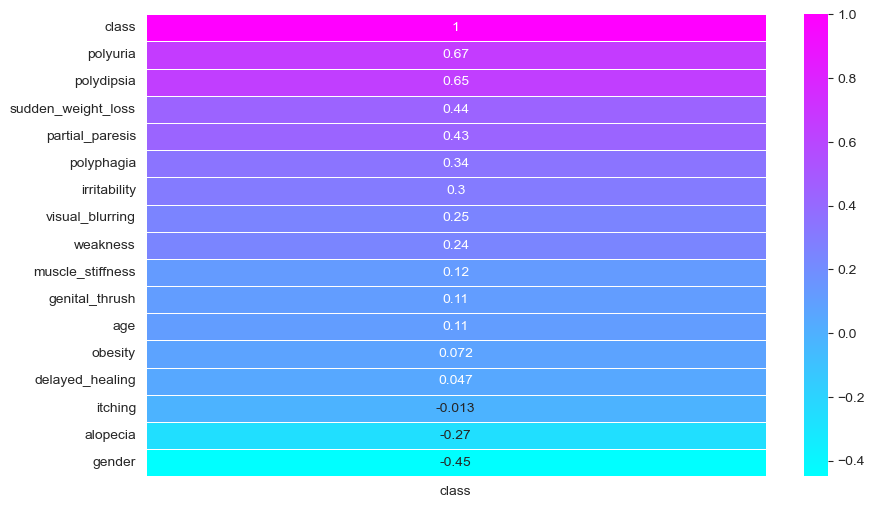

In [12]:
display(HTML(styled_heading("Hedef Sütunla Korelasyon")))
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[['class']].sort_values(by='class', ascending=False), annot=True, cmap='cool', linewidths=0.5)
plt.show()

class
1    320
0    200
Name: count, dtype: int64


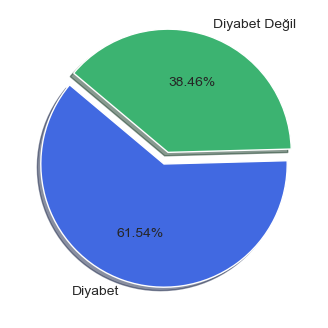

In [13]:
display(HTML(styled_heading('Diyabet Hastalarının Dağılımı')))
df_class = df['class'].value_counts()
print(df_class)
plt.figure(figsize=(6, 4))
plt.pie(x=df_class, autopct='%.2f%%', labels=['Diyabet', 'Diyabet Değil'], startangle=140, shadow=True, explode=[0, 0.1], colors=['royalblue', 'mediumseagreen'])
plt.show()


In [14]:
display(HTML(styled_heading("Semptoma Sahip ve Sahip Olmayan Kişi Sayısı")))

df_binary = df.drop(columns=['age', 'gender', 'class'])
binary_counts = df_binary.apply(lambda x: x.value_counts()).T
#buradaki T dataframe'in  transpoze edilmesi sağlar.
binary_counts.rename(columns={0: 'Semptoma sahip ', 1: 'Semptoma sahip değil'}, inplace=True)
display(binary_counts.style.background_gradient('Blues'))


,Semptoma sahip,Semptoma sahip değil
polyuria,262,258
polydipsia,287,233
sudden_weight_loss,303,217
weakness,215,305
polyphagia,283,237
genital_thrush,404,116
visual_blurring,287,233
itching,267,253
irritability,394,126
delayed_healing,281,239


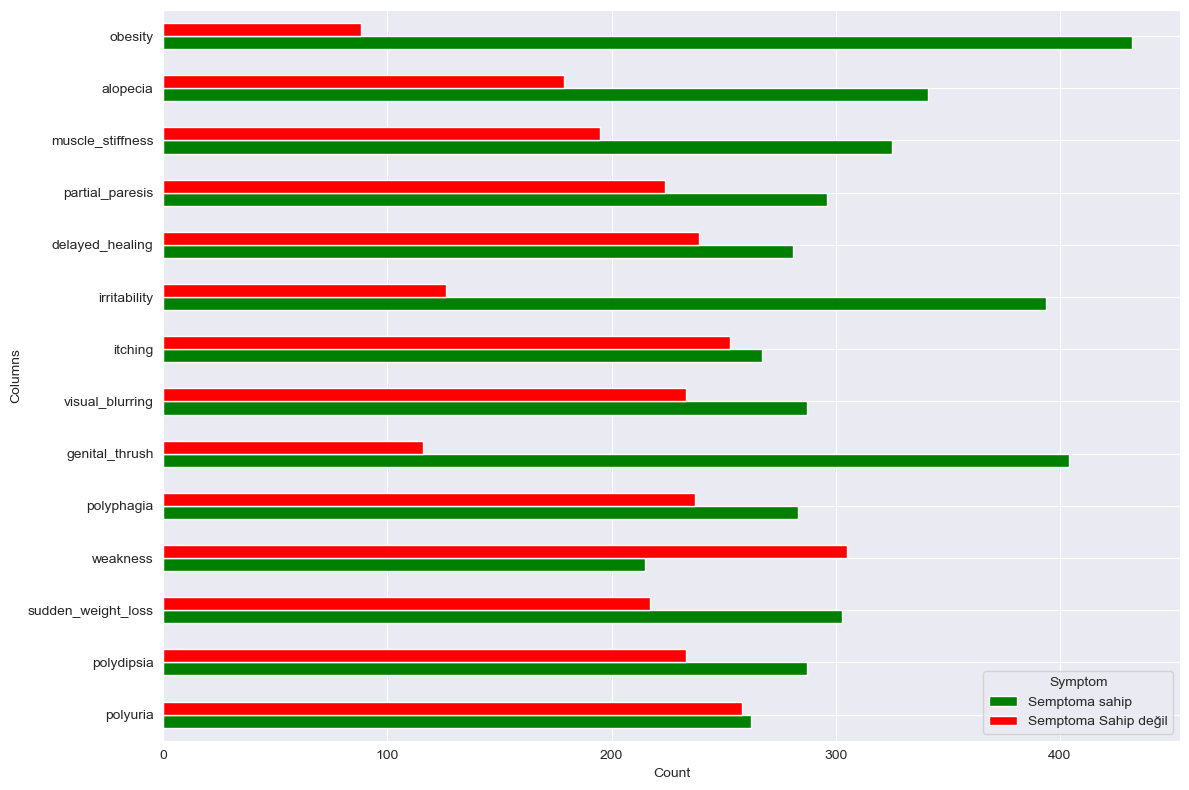

In [15]:
display(HTML(styled_heading("Semptoma Sahip ve Sahip Olmayan Kişi Sayısı")))
binary_counts.plot(kind='barh', stacked=False, figsize=(12, 8), color=['green', 'red'])
plt.ylabel("Columns")
plt.xlabel("Count")
plt.legend(title="Symptom", labels=['Semptoma sahip ', 'Semptoma Sahip değil'])
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


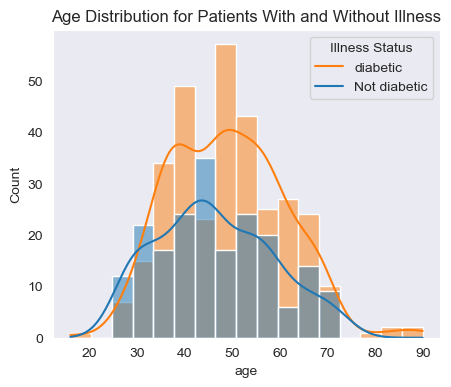

In [16]:
display(HTML(styled_heading("Hastalık Durumuna Göre Yaş Dağılımı")))

plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='age', hue='class', kde=True)
plt.legend(title="Illness Status", labels=['diabetic', 'Not diabetic'])
plt.title("Age Distribution for Patients With and Without Illness")
plt.grid()
plt.show()

In [17]:
display(HTML(styled_heading("Semptom Varlığına Göre Ortalama Yaş Analizi ")))

overall_mean_age = df.age.mean()
mean_age_class_0 = df[df['class'] == 0]['age'].mean()
mean_age_class_1 = df[df['class'] == 1]['age'].mean()
print(f"Overall Mean Age: {overall_mean_age:.2f}")
print(f"Mean Age for Those Without the Symptom (class 0): {mean_age_class_0:.2f}")
print(f"Mean Age for Those With the Symptom (class 1): {mean_age_class_1:.2f}")

Overall Mean Age: 48.03
Mean Age for Those Without the Symptom (class 0): 46.36
Mean Age for Those With the Symptom (class 1): 49.07


gender,Kadın,Erkek
class,,
Diyabet Değil,19,181
Diyabet,173,147


<Figure size 500x400 with 0 Axes>

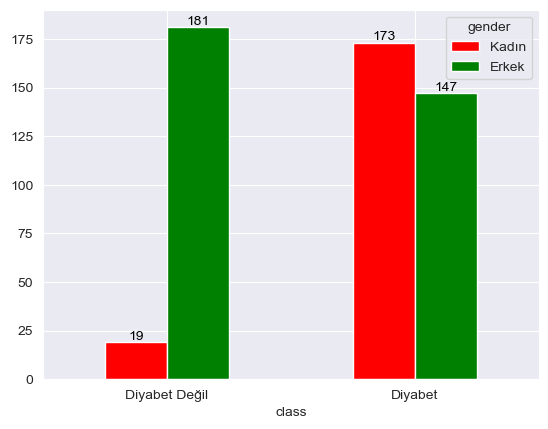

In [18]:
display(HTML(styled_heading('Diyabet Durumuna Göre Cinsiyet Dağılımı')))

class_based_gender = df.groupby('class').gender.value_counts().unstack().rename(columns={0:'Kadın', 1:'Erkek'}, index={0:'Diyabet Değil', 1:'Diyabet'})
display(class_based_gender)

plt.figure(figsize=(5, 4))
ax = class_based_gender.plot(kind='bar', color=['red', 'green'])


for p in ax.patches:  
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),   
                ha='center', va='bottom', fontsize=10, color='black')  
plt.xticks(rotation = 0)
plt.show()

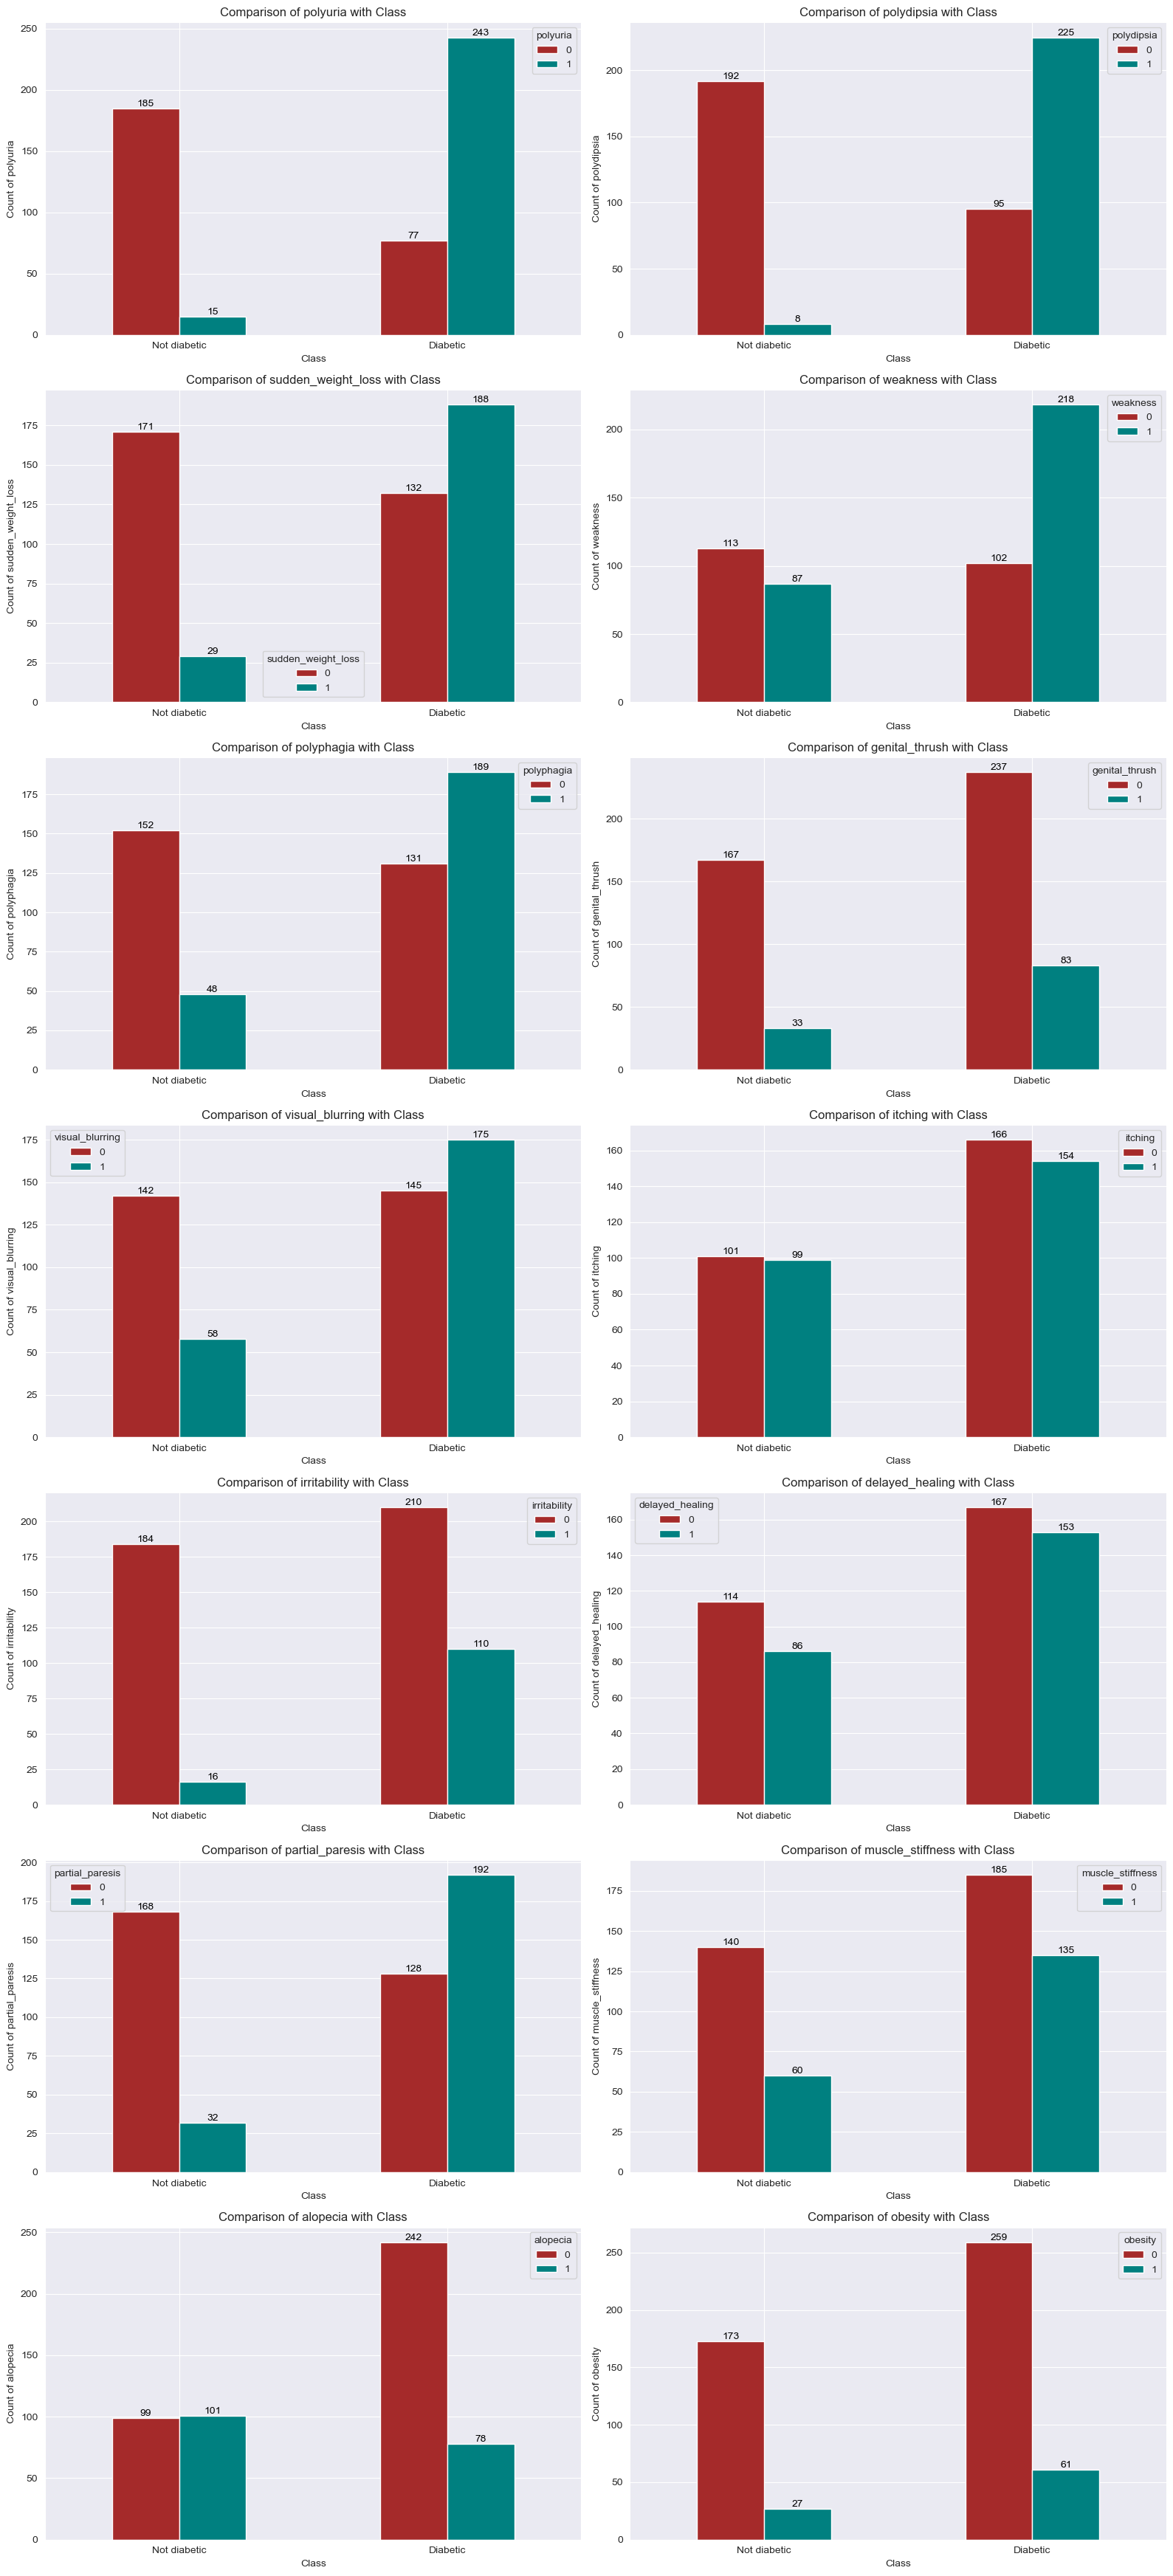

In [19]:
display(HTML(styled_heading("Semptomların Diyabet Durumuyla Karşılaştırılması "))) #semptomların diyabet durumu ile karşılaştırılması
feature = df.drop(['class', 'age', 'gender'], axis=1)

plt.figure(figsize=(16, 35))

for i, col in enumerate(feature.columns, start=1):
    class_based_column = df.groupby('class')[col].value_counts().unstack(fill_value=0).rename(
        index={0: 'Not diabetic', 1: 'Diabetic'})

    plt.subplot(7, 2, i)
    ax= class_based_column.plot(kind='bar', color=['brown', 'teal'], ax=plt.gca())
    plt.title(f'Comparison of {col} with Class')
    plt.xlabel('Class')
    plt.ylabel(f'Count of {col}')
    plt.xticks(rotation=0)
    
    for p in ax.patches:  
        ax.annotate(f'{int(p.get_height())}',   
                (p.get_x() + p.get_width() / 2, p.get_height()),   
                ha='center', va='bottom', fontsize=10, color='black')  

plt.tight_layout()
plt.show()

In [20]:
display(HTML(styled_heading('Verinin Bölünmesi')))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set feature shape: {X_train.shape}")
print(f"Test set feature shape: {X_test.shape}")

Training set size: 364 samples
Test set size: 156 samples
Training set feature shape: (364, 16)
Test set feature shape: (156, 16)


In [39]:
display(HTML(styled_heading('SMOTE Metodu')))
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Eğitim seti boyutu: {X_train.shape} örnek ")
print(f"SMOTE sonrası eğitim seti boyutu: {X_train_resampled.shape} örnek \n")
print(f"Eğitim verisi: {X_train_resampled.shape}")
print(f"Test verisi: {X_test.shape}")

print("\nSMOTE sonrası sınıf dağılımı:")
print(y_train_resampled.value_counts())



Eğitim seti boyutu: (364, 16) örnek 
SMOTE sonrası eğitim seti boyutu: (436, 16) örnek 

Eğitim verisi: (436, 16)
Test verisi: (156, 16)

SMOTE sonrası sınıf dağılımı:
class
0    218
1    218
Name: count, dtype: int64


Logistic Regression Model Doğruluğu (Accuracy): 93.59%
Logistic Regression Model AUC: 98.51%
Precision: 95.10%
Recall: 95.10%
F1-Measure: 95.10%
AUC: 98.51%
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



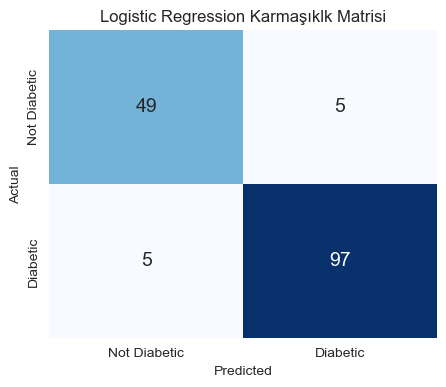

In [22]:
display(HTML(styled_heading('Logistic Regression Analizi')))
# Modeli tanımlama ve eğitme
Model_LogReg = LogisticRegression(solver='liblinear', random_state=42)
Model_LogReg.fit(X_train_resampled, y_train_resampled)

y_pred = Model_LogReg.predict(X_test)
y_pred_proba_LogReg = Model_LogReg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Doğruluğu (Accuracy): {accuracy * 100:.2f}%")

auc = roc_auc_score(y_test, y_pred_proba_LogReg)
print(f"Logistic Regression Model AUC: {auc* 100:.2f}%")

precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  


print(f"Precision: {precision* 100:.2f}%")  
print(f"Recall: {recall* 100:.2f}%")  
print(f"F1-Measure: {f1* 100:.2f}%")  
print(f"AUC: {auc* 100:.2f}%")  

print(classification_report(y_test, y_pred))
  

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'], 
            yticklabels=['Not Diabetic', 'Diabetic'],
            annot_kws={"size": 14})
plt.title('Logistic Regression Karmaşıklık Matrisi')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Model Doğruluğu: 99.36%
Random Forest Model AUC: 100.00%
Precision: 100.00%
Recall: 99.02%
F1-Measure: 99.51%
AUC: 100.00%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



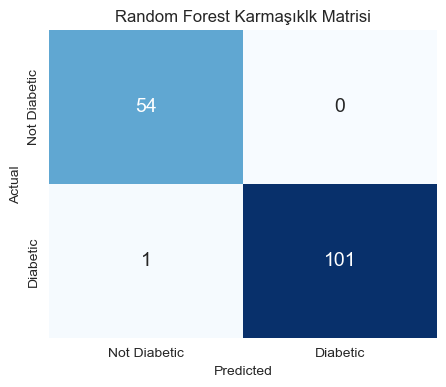

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
display(HTML(styled_heading('Random Forest Analizi')))

Model_RndmFrst = RandomForestClassifier(random_state=42)
Model_RndmFrst.fit(X_train_resampled, y_train_resampled)


y_pred = Model_RndmFrst.predict(X_test)


y_pred_proba_rf = Model_RndmFrst.predict_proba(X_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Doğruluğu: {accuracy_rf * 100:.2f}%")
auc = roc_auc_score(y_test, y_pred_proba_rf)  # AUC'yu hesapla  
print(f"Random Forest Model AUC: {auc* 100:.2f}%")
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
auc = roc_auc_score(y_test, y_pred_proba_rf)  


print(f"Precision: {precision* 100:.2f}%")  
print(f"Recall: {recall* 100:.2f}%")  
print(f"F1-Measure: {f1* 100:.2f}%")  
print(f"AUC: {auc* 100:.2f}%")  


print(classification_report(y_test, y_pred))

 

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'], 
            yticklabels=['Not Diabetic', 'Diabetic'],
            annot_kws={"size": 14})
plt.title('Random Forest Karmaşıklık Matrisi')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




KNN Model Doğruluğu: 89.10%
KNN Model AUC: 98.50%
Precision: 96.70%
Recall: 86.27%
F1-Measure: 91.19%
AUC: 98.50%
              precision    recall  f1-score   support

           0       0.78      0.94      0.86        54
           1       0.97      0.86      0.91       102

    accuracy                           0.89       156
   macro avg       0.88      0.90      0.88       156
weighted avg       0.90      0.89      0.89       156



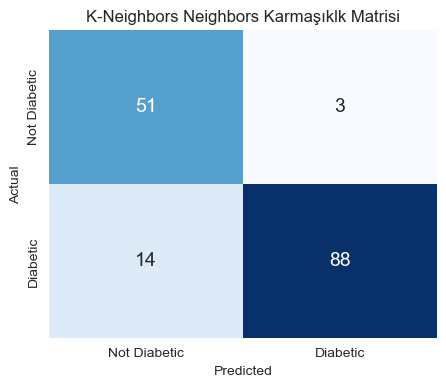

In [24]:
from sklearn.neighbors import KNeighborsClassifier  
display(HTML(styled_heading('K-Neighbors Analizi')))

Model_knn = KNeighborsClassifier(n_neighbors=5)  # k=5

Model_knn.fit(X_train_resampled, y_train_resampled)

y_pred = Model_knn.predict(X_test)

y_pred_proba_knn = Model_knn.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Doğruluğu: {accuracy * 100:.2f}%")


auc = roc_auc_score(y_test,  y_pred_proba_knn)
print(f"KNN Model AUC: {auc* 100:.2f}%")

precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
auc = roc_auc_score(y_test, y_pred_proba_knn)  


print(f"Precision: {precision* 100:.2f}%")  
print(f"Recall: {recall* 100:.2f}%")  
print(f"F1-Measure: {f1* 100:.2f}%")  
print(f"AUC: {auc* 100:.2f}%")   

print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'], 
            yticklabels=['Not Diabetic', 'Diabetic'],
            annot_kws={"size": 14})
plt.title('K-Neighbors Neighbors Karmaşıklık Matrisi')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Model Doğruluğu: 92.95%
SVM Model AUC: 97.59%
Precision: 95.05%
Recall: 94.12%
F1-Measure: 94.58%
AUC: 97.59%
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        54
           1       0.95      0.94      0.95       102

    accuracy                           0.93       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.93      0.93      0.93       156



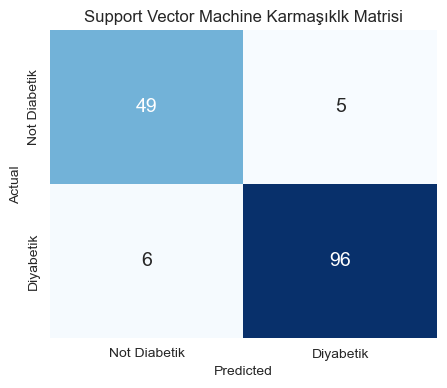

In [25]:
from sklearn.svm import SVC
display(HTML(styled_heading('Support Vector Machine Analizi')))

Model_Svm = SVC(kernel='linear', probability=True)


Model_Svm.fit(X_train_resampled, y_train_resampled)

y_pred = Model_Svm.predict(X_test)  
y_pred_proba_Svm = Model_Svm.predict_proba(X_test)[:,1]  # Diyabet olma olasılığını al


accuracy = accuracy_score(y_test, y_pred)  
print(f"SVM Model Doğruluğu: {accuracy * 100:.2f}%")
auc = roc_auc_score(y_test, y_pred_proba_Svm)  
print(f"SVM Model AUC: {auc* 100:.2f}%")
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
auc = roc_auc_score(y_test, y_pred_proba_Svm)  

print(f"Precision: {precision* 100:.2f}%")  
print(f"Recall: {recall* 100:.2f}%")  
print(f"F1-Measure: {f1* 100:.2f}%")  
print(f"AUC: {auc* 100:.2f}%")  

print(classification_report(y_test, y_pred))  

conf_matrix = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,   
            xticklabels=['Not Diabetik', 'Diyabetik'],   
            yticklabels=['Not Diabetik', 'Diyabetik'],
            annot_kws={"size": 14})  
plt.title('Support Vector Machine Karmaşıklık Matrisi')  
plt.xlabel('Predicted')
plt.ylabel('Actual') 
plt.show()  

Naive Bayes Model Doğruluğu: 91.03%
Naive Bayes Model AUC: 96.99%
Precision: 91.51%
Recall: 95.10%
F1-Measure: 93.27%
AUC: 96.99%
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        54
           1       0.92      0.95      0.93       102

    accuracy                           0.91       156
   macro avg       0.91      0.89      0.90       156
weighted avg       0.91      0.91      0.91       156



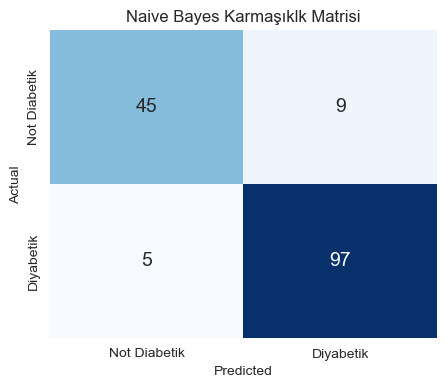

In [26]:
display(HTML(styled_heading('Naive Bayes Analizi')))

Model_NB = GaussianNB()

Model_NB.fit(X_train_resampled, y_train_resampled)

y_pred = Model_NB.predict(X_test)
y_pred_proba_NB = Model_NB.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Doğruluğu: {accuracy * 100:.2f}%")  


auc = roc_auc_score(y_test, y_pred_proba_NB )  
print(f"Naive Bayes Model AUC: {auc* 100:.2f}%")

precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  
auc = roc_auc_score(y_test, y_pred_proba_NB)  


print(f"Precision: {precision* 100:.2f}%")  
print(f"Recall: {recall* 100:.2f}%")  
print(f"F1-Measure: {f1* 100:.2f}%")  
print(f"AUC: {auc* 100:.2f}%")   


print(classification_report(y_test, y_pred))  


conf_matrix = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,   
            xticklabels=['Not Diabetik', 'Diyabetik'],   
            yticklabels=['Not Diabetik', 'Diyabetik'],
            annot_kws={"size": 14})  
plt.title('Naive Bayes Karmaşıklık Matrisi')  
plt.xlabel('Predicted')
plt.ylabel('Actual') 
plt.show()  


XGBoost Model Doğruluğu: 98.72%
XGBoost Model AUC: 99.91%
Precision: 100.00%
Recall: 98.04%
F1-Measure: 99.01%
AUC: 99.91%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.98      0.99       102

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



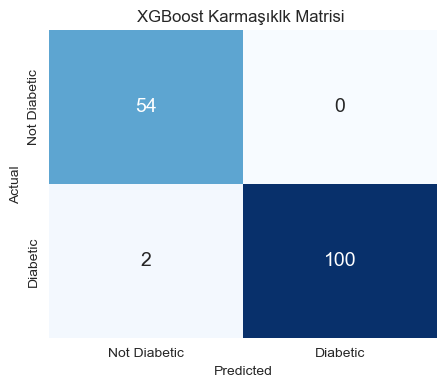

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
display(HTML(styled_heading('XGBoost Analizi')))

Model_XGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

Model_XGB.fit(X_train_resampled, y_train_resampled)

y_pred = Model_XGB.predict(X_test)
y_pred_proba_XGB = Model_XGB.predict_proba(X_test)[:, 1]  # Diyabet olma olasılığını al

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Doğruluğu: {accuracy * 100:.2f}%")

auc = roc_auc_score(y_test, y_pred_proba_XGB)
print(f"XGBoost Model AUC: {auc * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Measure: {f1 * 100:.2f}%")
print(f"AUC: {auc * 100:.2f}%")

print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'],
            annot_kws={"size": 14})
plt.title('XGBoost Karmaşıklık Matrisi ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
display(HTML(styled_heading(' Sınıflandırma Modellerinin Değerlendirmesi ')))
accuracy = accuracy_score(y_test, Model_LogReg .predict(X_test))
print(f"Logistic Regression Model Doğruluğu (Accuracy): {accuracy * 100:.2f}%")
print(classification_report(y_test, Model_LogReg .predict(X_test)))


accuracy_rf = accuracy_score(y_test, Model_RndmFrst.predict(X_test))
print(f"Random Forest Model Doğruluğu: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, Model_RndmFrst.predict(X_test)))

accuracy = accuracy_score(y_test, Model_knn.predict(X_test))
print(f"KNN Model Doğruluğu: {accuracy * 100:.2f}%")
print(classification_report(y_test, Model_knn.predict(X_test)))

accuracy = accuracy_score(y_test, Model_Svm.predict(X_test) )  
print(f"SVM Model Doğruluğu: {accuracy * 100:.2f}%")  
print(classification_report(y_test, Model_Svm.predict(X_test) ))

accuracy = accuracy_score(y_test, Model_NB.predict(X_test))  
print(f"Naive Bayes Model Doğruluğu: {accuracy * 100:.2f}%")  
print(classification_report(y_test, Model_NB.predict(X_test)))


Logistic Regression Model Doğruluğu (Accuracy): 93.59%
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156

Random Forest Model Doğruluğu: 99.36%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156

KNN Model Doğruluğu: 89.10%
              precision    recall  f1-score   support

           0       0.78      0.94      0.86        54
           1       0.97      0.86      0.91       102

    accuracy                           0.89       156
   macr

In [29]:
display(HTML(styled_heading('Random Forest Modelinde Özellik Önemini Değerlendirme')))
importances = Model_RndmFrst.feature_importances_  

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df['Importance (%)'] = (importance_df['Importance'] * 100).round(2)
importance_df = importance_df[['Feature', 'Importance (%)']]
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)

print(importance_df)


               Feature  Importance (%)
2             polyuria           23.25
3           polydipsia           17.02
1               gender           11.74
0                  age            8.73
4   sudden_weight_loss            7.89
10        irritability            4.57
12     partial_paresis            4.36
14            alopecia            4.02
9              itching            2.88
11     delayed_healing            2.63
6           polyphagia            2.54
8      visual_blurring            2.45
5             weakness            2.33
13    muscle_stiffness            2.25
7       genital_thrush            2.04
15             obesity            1.32


In [30]:

display(HTML(styled_heading('Random Forest Modeliyle  Risk Yüzdelerini Hesaplama ve Görüntüleme')))
risk_percentages_rf = y_pred_proba_rf * 100
for i in range(len(X_test)):
    print(f"Random Forest Örnek {i+1}: Tahmin = {y_pred[i]}, Risk = {risk_percentages_rf[i]:.2f}%")

Random Forest Örnek 1: Tahmin = 0, Risk = 0.00%
Random Forest Örnek 2: Tahmin = 1, Risk = 98.00%
Random Forest Örnek 3: Tahmin = 1, Risk = 97.00%
Random Forest Örnek 4: Tahmin = 1, Risk = 95.00%
Random Forest Örnek 5: Tahmin = 1, Risk = 98.00%
Random Forest Örnek 6: Tahmin = 1, Risk = 100.00%
Random Forest Örnek 7: Tahmin = 1, Risk = 100.00%
Random Forest Örnek 8: Tahmin = 0, Risk = 38.00%
Random Forest Örnek 9: Tahmin = 1, Risk = 64.00%
Random Forest Örnek 10: Tahmin = 0, Risk = 0.00%
Random Forest Örnek 11: Tahmin = 0, Risk = 0.00%
Random Forest Örnek 12: Tahmin = 1, Risk = 100.00%
Random Forest Örnek 13: Tahmin = 0, Risk = 1.00%
Random Forest Örnek 14: Tahmin = 0, Risk = 1.00%
Random Forest Örnek 15: Tahmin = 1, Risk = 97.00%
Random Forest Örnek 16: Tahmin = 1, Risk = 95.00%
Random Forest Örnek 17: Tahmin = 0, Risk = 0.00%
Random Forest Örnek 18: Tahmin = 1, Risk = 100.00%
Random Forest Örnek 19: Tahmin = 0, Risk = 1.00%
Random Forest Örnek 20: Tahmin = 1, Risk = 98.00%
Random Fores